In [1]:
import transfer_entropy_NHB_REV_Version as TE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/data/Times_series_sa_det.csv")
lista = ["Atlanta-Sandy Springs-Alpharetta, GA MSA",
    "Baltimore-Columbia-Towson, MD MSA",
    "Boston-Cambridge-Newton, MA-NH MSA",
    "Chicago-Naperville-Elgin, IL-IN-WI MSA",
    "Dallas-Fort Worth-Arlington, TX MSA",
    "Denver-Aurora-Lakewood, CO MSA",
    "Detroit_Dearborn, MI MSA",
    "Houston-The Woodlands-Sugar Land, TX MSA",
    "Los Angeles-Long Beach-Anaheim, CA MSA",
    "Miami-Fort Lauderdale-West Palm Beach, FL MSA",
    "Minneapolis-St. Paul-Bloomington, MN-WI MSA",
    "New York-Newark-Jersey City, NY-NJ-PA MSA",
    "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",
    "Phoenix-Mesa-Chandler, AZ MSA",
    "Riverside-San Bernardino-Ontario, CA MSA",
    "San Francisco-Oakland-Berkeley, CA MSA",
    "Tampa-St. Petersburg-Clearwater, FL MSA",
    "Washington-Arlington-Alexandria, DC-VA-MD-WV MSA"]

In [3]:
df

,Unnamed: 0,Ref_Date,"Tweet search - Atlanta-Sandy Springs-Alpharetta, GA MSA_sent_Hugged_Positive","Tweet search - Atlanta-Sandy Springs-Alpharetta, GA MSA_sent_Hugged_Negative","Tweet search - Baltimore-Columbia-Towson, MD MSA_sent_Hugged_Positive","Tweet search - Baltimore-Columbia-Towson, MD MSA_sent_Hugged_Negative","Tweet search - Boston-Cambridge-Newton, MA-NH MSA_sent_Hugged_Positive","Tweet search - Boston-Cambridge-Newton, MA-NH MSA_sent_Hugged_Negative","Tweet search - Chicago-Naperville-Elgin, IL-IN-WI MSA_sent_Hugged_Positive","Tweet search - Chicago-Naperville-Elgin, IL-IN-WI MSA_sent_Hugged_Negative",...,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA_crimes_lagged_sa_det","Atlanta-Sandy Springs-Alpharetta, GA MSA_crimes_lagged_sa_det","Miami-Fort Lauderdale-West Palm Beach, FL MSA_crimes_lagged_sa_det","Phoenix-Mesa-Chandler, AZ MSA_crimes_lagged_sa_det","Boston-Cambridge-Newton, MA-NH MSA_crimes_lagged_sa_det","San Francisco-Oakland-Berkeley, CA MSA_crimes_lagged.1_sa_det","Minneapolis-St. Paul-Bloomington, MN-WI MSA_crimes_lagged_sa_det","Tampa-St. Petersburg-Clearwater, FL MSA_crimes_lagged_sa_det","Denver-Aurora-Lakewood, CO MSA_crimes_lagged_sa_det","Baltimore-Columbia-Towson, MD MSA_crimes_lagged_sa_det"
0,0,2010-10-01 00:00:00+00:00,1,0,0,1,1,3,1,7,...,0.718682,0.555134,0.968274,-1.418904,1.399561,0.952305,-0.271054,0.042479,0.005852,1.825122
1,1,2010-10-02 00:00:00+00:00,0,1,1,1,0,5,0,0,...,-1.039865,-1.384707,-0.384025,-1.318400,1.268672,-1.092086,-0.405328,1.075212,0.080295,1.152312
2,2,2010-10-03 00:00:00+00:00,1,2,0,4,0,1,0,3,...,2.002314,-1.013134,1.351646,-0.713268,0.184239,-1.570037,-0.136482,0.810649,0.563463,2.011598
3,3,2010-10-04 00:00:00+00:00,1,4,0,9,0,0,1,6,...,-0.045216,-0.970814,-0.085841,-1.118873,1.164497,2.882573,-0.290864,0.137825,0.850895,0.305677
4,4,2010-10-05 00:00:00+00:00,1,0,0,6,0,3,1,3,...,-1.864624,-1.538806,0.020878,-2.782065,3.070940,0.967111,-0.618173,0.247216,0.834331,1.314451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,3740,2020-12-27 00:00:00+00:00,2,9,0,3,1,4,4,25,...,-0.182134,3.274689,0.669410,0.776847,-0.413606,0.262774,-0.388326,-0.100116,-0.256590,-0.010136
3741,3741,2020-12-28 00:00:00+00:00,2,4,0,5,1,4,2,11,...,0.757027,0.240156,0.959048,0.548666,0.738982,0.206044,1.665580,0.047949,0.274079,-0.640642
3742,3742,2020-12-29 00:00:00+00:00,4,11,1,3,0,6,3,16,...,0.174310,1.976421,0.078056,-0.177272,-0.279187,-0.536441,0.365423,-0.567749,-0.209850,-1.639001
3743,3743,2020-12-30 00:00:00+00:00,0,10,0,11,0,8,0,18,...,0.938852,-1.185869,-0.317928,0.926442,-0.255807,0.191595,0.639010,0.016961,0.187233,1.227381


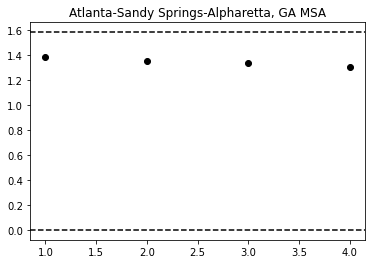

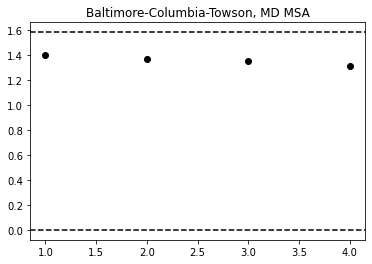

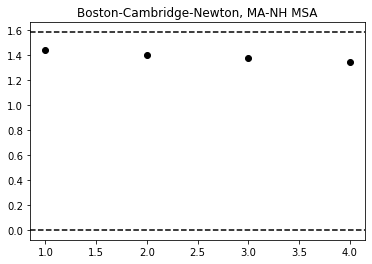

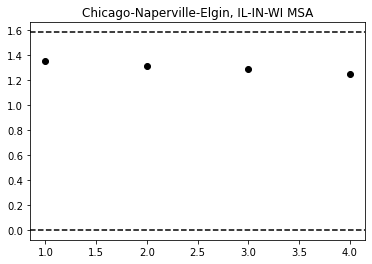

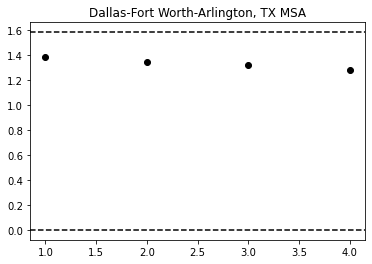

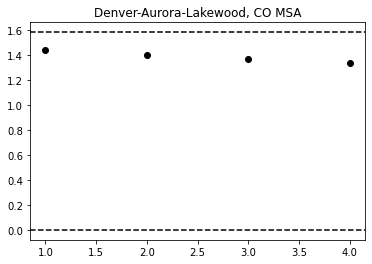

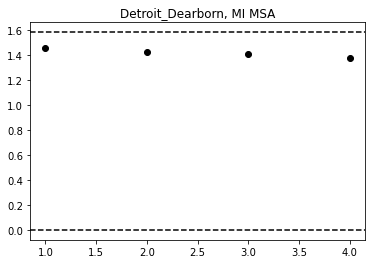

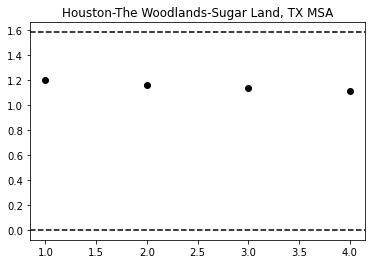

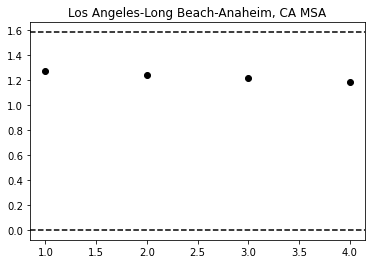

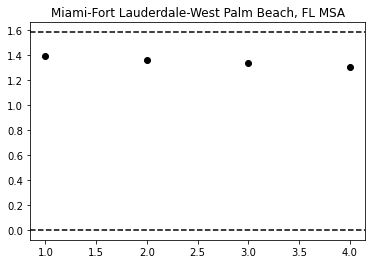

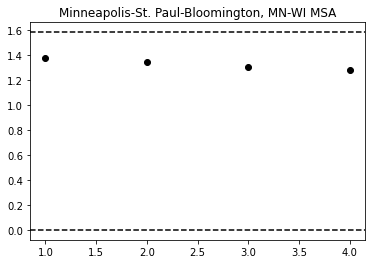

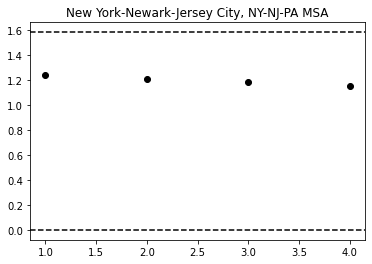

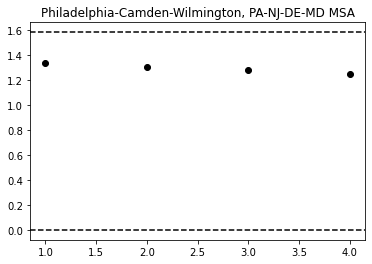

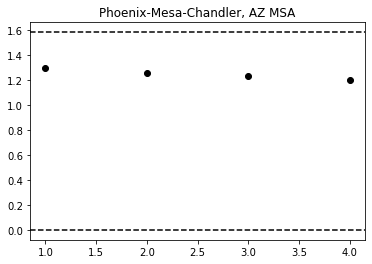

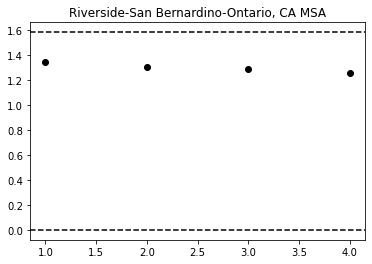

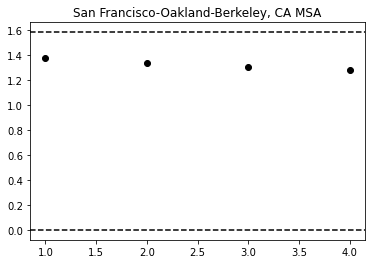

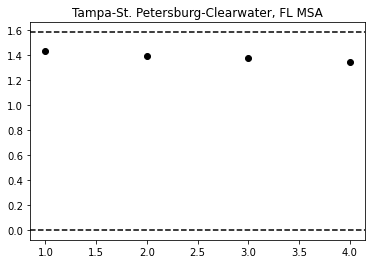

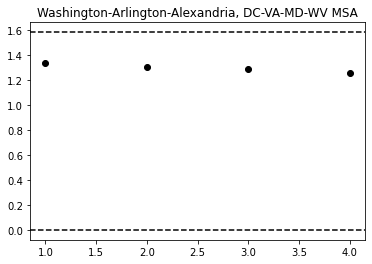

In [4]:
NegCond = []
histories = [2,3,4,5]
for l in lista:
    NT = TE.Median_Symbolise_3bins(df["Tweet search - "+l+"_sent_Hugged_Negative_sa_det"]).values
    tempneg = []
    for history in histories: 
        embeded_dynamics = TE.takensEmbedding(NT,1,history)
        Xt = embeded_dynamics[-1:][0]
        Xhis = TE.joint(embeded_dynamics[:-1])
        tempneg.append(TE.CondEntropy(Xt,Xhis))
        plt.scatter(history-1,TE.CondEntropy(Xt,Xhis), color = "k")
    NegCond.append(tempneg)
    plt.title(l)
    plt.axhline(y = TE.CondEntropy(NT,np.ones(len(NT))), color='k', linestyle='--')
    plt.axhline(y = 0, color='k', linestyle='--')
    plt.show()    

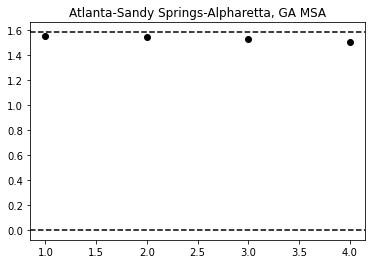

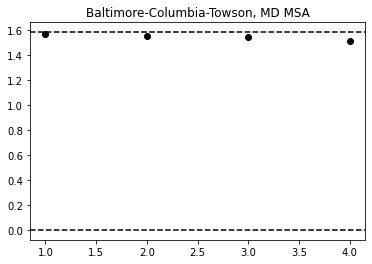

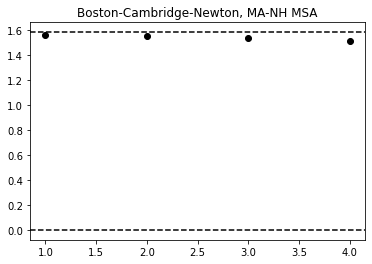

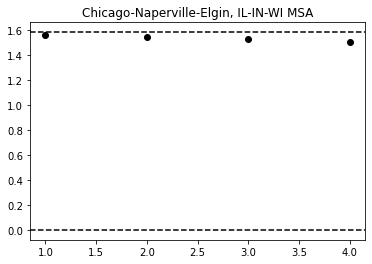

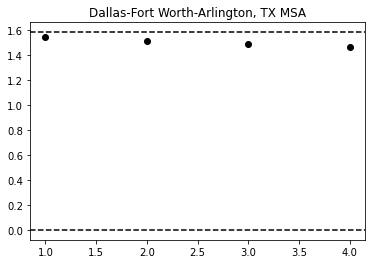

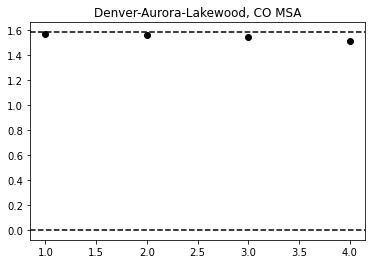

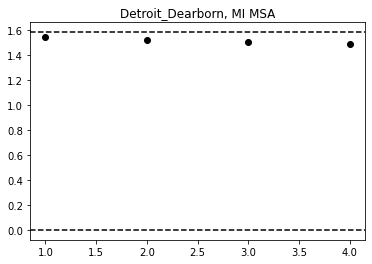

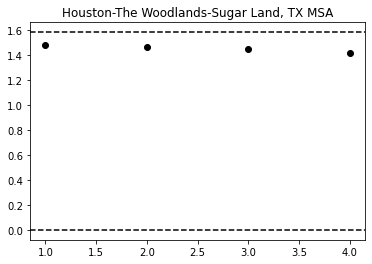

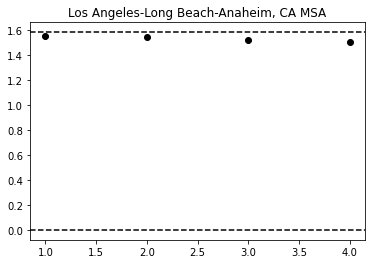

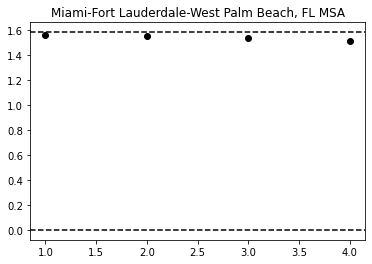

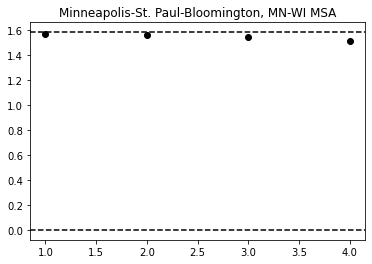

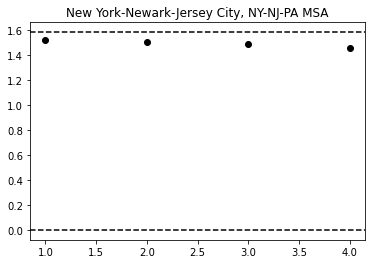

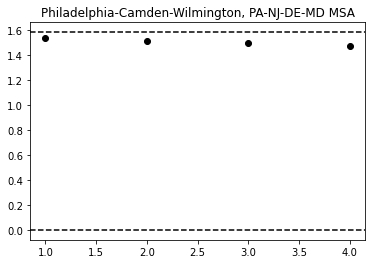

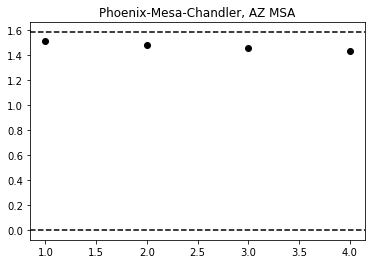

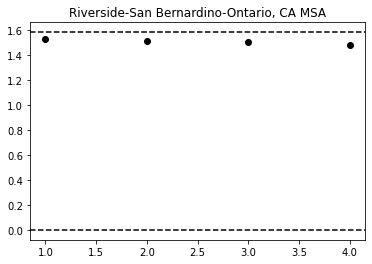

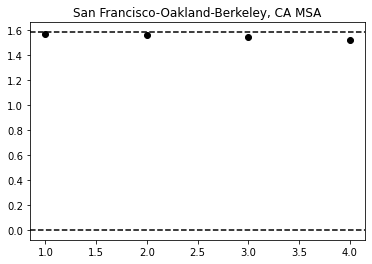

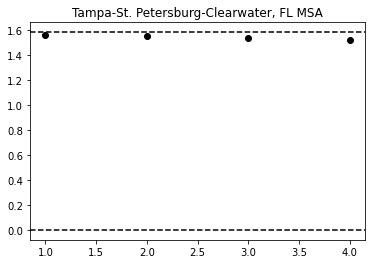

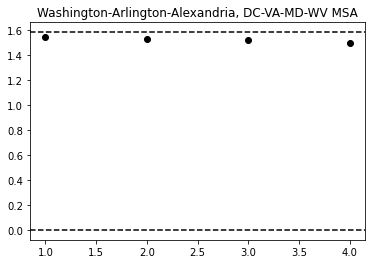

In [5]:
PosCond = []
for l in lista:
    NT = TE.Median_Symbolise_3bins(df["Tweet search - "+l+"_sent_Hugged_Positive_sa_det"]).values
    temppos = []
    for history in histories: 
        embeded_dynamics = TE.takensEmbedding(NT,1,history)
        Xt = embeded_dynamics[-1:][0]
        Xhis = TE.joint(embeded_dynamics[:-1])
        temppos.append(TE.CondEntropy(Xt,Xhis))
        plt.scatter(history-1,TE.CondEntropy(Xt,Xhis), color = "k")
    PosCond.append(temppos)
    plt.title(l)
    plt.axhline(y = TE.CondEntropy(NT,np.ones(len(NT))), color='k', linestyle='--')
    plt.axhline(y = 0, color='k', linestyle='--')
    plt.show()

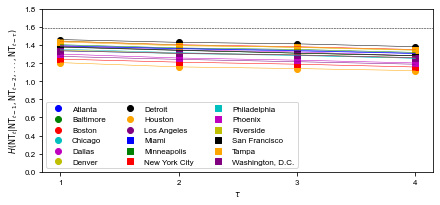

In [6]:
listaa = ["Atlanta",
    "Baltimore",
    "Boston",
    "Chicago",
    "Dallas",
    "Denver",
    "Detroit",
    "Houston",
    "Los Angeles",
    "Miami",
    "Minneapolis",
    "New York City",
    "Philadelphia",
    "Phoenix",
    "Riverside",
    "San Francisco",
    "Tampa",
    "Washington, D.C."]

colors = ["b", "g", "r", "c", "m", "y", "k", "orange", "purple","b", "g", "r", "c", "m", "y", "k", "orange","purple"]
markers = ["o","o","o","o","o","o","o","o","o","s","s","s","s","s","s","s","s","s"]
plt.rcParams.update({
  'font.size' : 8,
  "lines.linewidth": 0.5,
  "font.family":"arial",
})
fig, (ax1)  = plt.subplots(1, 1,
                                    sharey='row',figsize=(7, 3))
for i in range(len(lista)):
    ax1.scatter(histories,NegCond[i], label = listaa[i],color = colors[i], marker = markers[i])
    ax1.plot(histories,NegCond[i], color = colors[i])
ax1.set_xlabel("$\u03c4$")
ax1.set_ylabel("$H(\mathrm{NT}_{t}|\mathrm{NT}_{t-1},\mathrm{NT}_{t-2},...,\mathrm{NT}_{t-\u03c4})$")
ax1.axhline(y = TE.CondEntropy(NT,np.ones(len(NT))), color='k', linestyle='--')
#ax1.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax1.set_ylim([0,1.8])
ax1.set_xticks(np.array(histories))
ax1.set_xticklabels(np.array(histories)-1);
#ax1.set_xlim([0,750])
plt.legend(ncol = 3, loc='lower left')
fig.savefig("../plots/sfig20a.png", dpi=150, bbox_inches="tight")

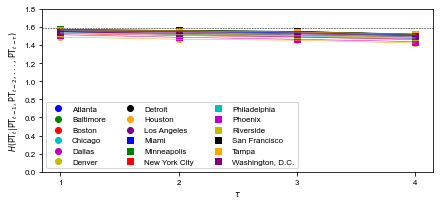

In [7]:
listaa = ["Atlanta",
    "Baltimore",
    "Boston",
    "Chicago",
    "Dallas",
    "Denver",
    "Detroit",
    "Houston",
    "Los Angeles",
    "Miami",
    "Minneapolis",
    "New York City",
    "Philadelphia",
    "Phoenix",
    "Riverside",
    "San Francisco",
    "Tampa",
    "Washington, D.C."]

colors = ["b", "g", "r", "c", "m", "y", "k", "orange", "purple","b", "g", "r", "c", "m", "y", "k", "orange","purple"]
markers = ["o","o","o","o","o","o","o","o","o","s","s","s","s","s","s","s","s","s"]
plt.rcParams.update({
  'font.size' : 8,
  "lines.linewidth": 0.5,
  "font.family":"arial",
})
fig, (ax1)  = plt.subplots(1, 1,
                                    sharey='row',figsize=(7, 3))
for i in range(len(lista)):
    ax1.scatter(histories,PosCond[i], label = listaa[i],color = colors[i], marker = markers[i])
    ax1.plot(histories,PosCond[i], color = colors[i])
ax1.axhline(y = TE.CondEntropy(NT,np.ones(len(NT))), color='k', linestyle='--')
ax1.set_xlabel("$\u03c4$")
ax1.set_ylabel("$H(\mathrm{PT}_{t}|\mathrm{PT}_{t-1},\mathrm{PT}_{t-2},...,\mathrm{PT}_{t-\u03c4})$")
ax1.set_ylim([0,1.8])
ax1.set_xticks(np.array(histories))
ax1.set_xticklabels(np.array(histories)-1);
#ax1.set_xlim([0,750])
plt.legend(ncol = 3, loc='lower left')
fig.savefig("../plots/sfig20b.png", dpi=150, bbox_inches="tight")